In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ecofunction import macd, ema, signal

## Importing data

In [2]:
intel_value = pd.read_csv("intc_us_d.csv")

intel_value = intel_value.iloc[:1000]
intel_value = intel_value[::-1]
intel_value['Srednia'] = (intel_value['Otwarcie'] + intel_value['Zamkniecie'])/2

intel_value.iloc[:10]

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Srednia
999,2021-12-20,48.0054,48.2165,47.0912,47.7066,3.133655e+07,47.85600
998,2021-12-17,48.6589,49.0721,48.1011,48.6872,5.218249e+07,48.67305
997,2021-12-16,48.8026,49.4375,48.6443,48.8895,3.444728e+07,48.84605
996,2021-12-15,47.9664,48.8416,47.4418,48.7361,3.388384e+07,48.35125
995,2021-12-14,47.9175,48.3513,47.4369,47.8023,3.547463e+07,47.85990
994,2021-12-13,48.9090,49.0721,48.0425,48.0914,3.714490e+07,48.50020
993,2021-12-10,48.8993,49.1200,48.1392,48.6589,2.472761e+07,48.77910
992,2021-12-09,49.3417,49.6152,48.5046,48.5524,3.295219e+07,48.94705
991,2021-12-08,50.5637,50.8607,49.4218,49.7744,3.861767e+07,50.16905
990,2021-12-07,52.5740,52.9002,50.2170,50.5637,9.537231e+07,51.56885


In [3]:
SIZE_OF_CHART=50

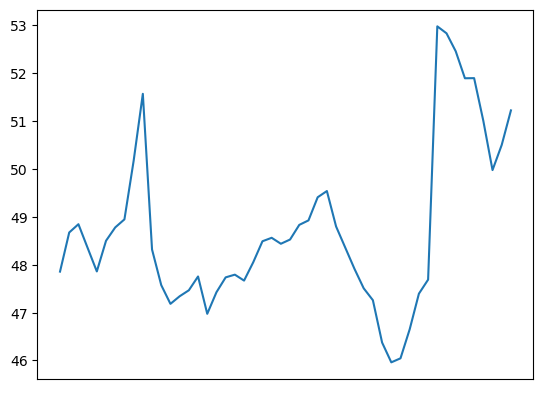

In [4]:
values = intel_value.iloc[:SIZE_OF_CHART]
x = values['Data']
y = values['Srednia']
plt.plot(x,y)
plt.xticks([])
plt.show()

In [5]:
intel_value.mean(axis=0)

C:\Users\kubas\AppData\Local\Temp\ipykernel_15576\2317636425.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intel_value.mean(axis=0)


Otwarcie      4.839163e+01
Najwyzszy     4.898245e+01
Najnizszy     4.781939e+01
Zamkniecie    4.839724e+01
Wolumen       3.057406e+07
Srednia       4.839443e+01
dtype: float64

## Testing

In [6]:
print(macd(intel_value[2:]))

0.20376142682904685


In [7]:
ema12 = ema(intel_value['Srednia'], 12)
ema26 = ema(intel_value['Srednia'], 26)
print(ema12)
print(ema26)
macd_value = ema12-ema26
print(macd_value)

48.558192435705024
48.39586182492153
0.1623306107834921


In [8]:
signal_val = signal(intel_value)
print(signal_val)

0.2186255355424949


## Collecting data to plot

In [9]:
print(macd(intel_value))

0.1623306107834921


In [10]:
x = np.arange(0,SIZE_OF_CHART)

In [11]:
values = intel_value
y1 = np.zeros(SIZE_OF_CHART)
for i in range(SIZE_OF_CHART):
    y1[i] = macd(values)
    values = values.iloc[1:]

In [12]:
values = intel_value
y2 = np.zeros(SIZE_OF_CHART)
for i in range(SIZE_OF_CHART):
    y2[i] = signal(values)
    values = values.iloc[1:]

In [13]:
values = intel_value
y3 = np.zeros(SIZE_OF_CHART)
for i in range(SIZE_OF_CHART):
    y3[i] = values['Srednia'].iloc[0]
    values = values.iloc[1:]

## Create a plot

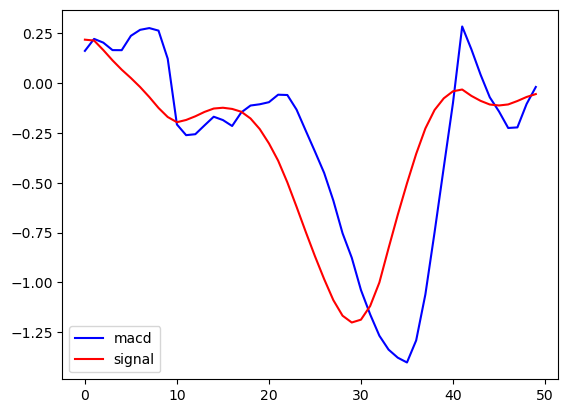

In [14]:
plt.plot(x,y1, 'b', label="macd")
plt.plot(x,y2, 'r', label="signal")
plt.legend()
plt.show()

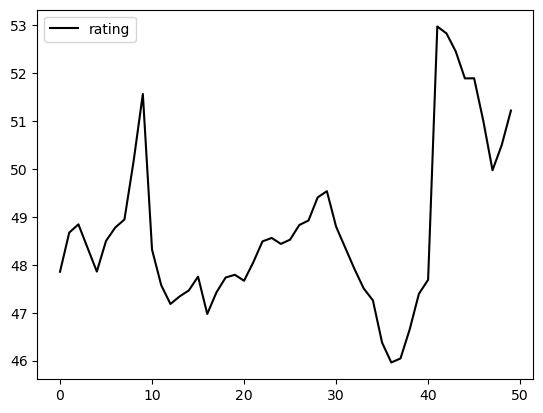

In [15]:
#TODO dla odwroconego y3 dziala dobrze
plt.plot(x, y3, 'k', label='rating')
plt.legend()
plt.show()

In [16]:
for i in range(5):
    print(f"Day[{i}]")
    print(f"\tmacd={y1[i]}")
    print(f"\tsignal={y2[i]}")

Day[0]
	macd=0.1623306107834921
	signal=0.2186255355424949
Day[1]
	macd=0.222527949748617
	signal=0.21424814672022544
Day[2]
	macd=0.20376142682904685
	signal=0.16649917681087187
Day[3]
	macd=0.16620504907393752
	signal=0.11487038616563755
Day[4]
	macd=0.16586414542284444
	signal=0.06794708024215544
